# Model Building

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm
import seaborn as sns

In [21]:
df = pd.read_csv('./Resources/data_cleanned.csv')

In [22]:
# Check the columns to define relevant variables
df.columns

Index(['Category', 'Type', 'Zipcode', 'City', 'Neighboor', 'Address',
       'Description', 'c_Elevador', 'c_Portaria', 'c_Piscina',
       'c_Portao_eletronico', 'c_Condominio_fechado', 'c_Segurança_24h',
       'c_Permitido_animais', 'c_Area_murada', 'c_Academia',
       'c_Salao_de_festas', 'p_Porteiro_24h', 'p_Churrasqueira', 'p_Piscina',
       'p_Armarios_embutidos', 'p_Ar_condicionado', 'p_Quarto_de_servico',
       'p_Varanda', 'p_Armarios_na_cozinha', 'p_Academia', 'p_Area_de_servico',
       'p_Mobiliado', 'p_Salao_de_festas', 'Price_Value', 'Area_value',
       'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty', 'square_meter_price',
       'full_adress', 'location'],
      dtype='object')

In [74]:
df_model = df[['Type', 'City', 'Neighboor',
       'c_Elevador', 'c_Portaria', 'c_Piscina',
       'c_Portao_eletronico', 'c_Condominio_fechado', 'c_Segurança_24h',
       'c_Permitido_animais', 'c_Area_murada', 'c_Academia',
       'c_Salao_de_festas', 'p_Porteiro_24h', 'p_Churrasqueira', 'p_Piscina',
       'p_Armarios_embutidos', 'p_Ar_condicionado', 'p_Quarto_de_servico',
       'p_Varanda', 'p_Armarios_na_cozinha', 'p_Academia', 'p_Area_de_servico',
       'p_Mobiliado', 'p_Salao_de_festas', 'Price_Value', 'Area_value',
       'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty']]


In [75]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

Index(['c_Elevador', 'c_Portaria', 'c_Piscina', 'c_Portao_eletronico',
       'c_Condominio_fechado', 'c_Segurança_24h', 'c_Permitido_animais',
       'c_Area_murada', 'c_Academia', 'c_Salao_de_festas',
       ...
       'Neighboor_Siqueira', 'Neighboor_São Bento', 'Neighboor_São Gerardo',
       'Neighboor_Tauape', 'Neighboor_Varjota', 'Neighboor_Vicente Pinzon',
       'Neighboor_Vila Peri', 'Neighboor_Vila União', 'Neighboor_Vila Velha',
       'Neighboor_Álvaro Weyne'],
      dtype='object', length=143)


In [77]:
columns_check = ['Price_Value', 'Area_value',
       'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty']

In [78]:
def plot_hist_dist(columns, df):
    for item in columns:
        mu, std = norm.fit(df[item])
        plt.hist(df[item], density=True, alpha=0.6)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = item + " Skew: {:.2f} and Kurtosis: {:.2f}".format(df[item].skew()
                                                                   ,df[item].kurtosis())
        plt.title(title) 
        plt.show()

In [122]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201 entries, 0 to 4200
Columns: 143 entries, c_Elevador to Neighboor_Álvaro Weyne
dtypes: float64(2), int64(25), uint8(116)
memory usage: 1.3 MB


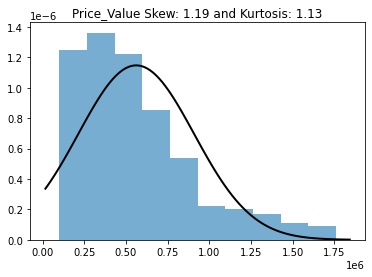

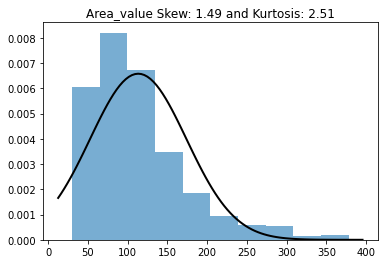

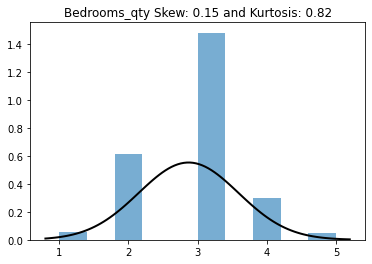

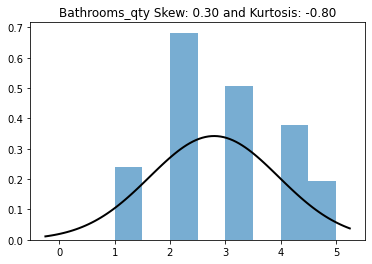

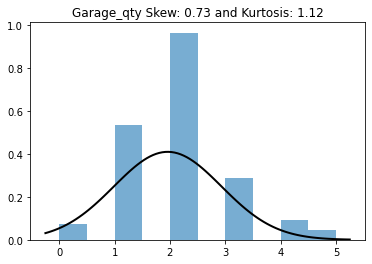

In [79]:
plot_hist_dist(columns_check,df_dum)

In [80]:
df_dum['Price_Value'] = np.log(df_dum['Price_Value'])
df_dum['Area_value'] = np.log(df_dum['Area_value'])

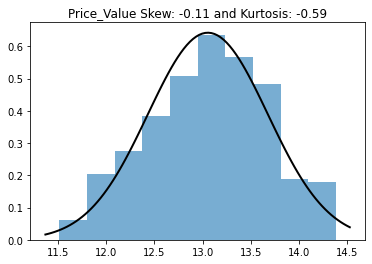

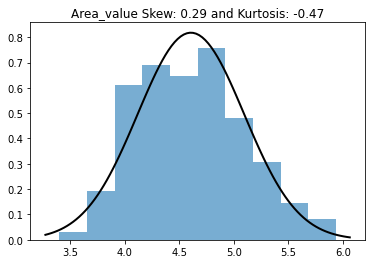

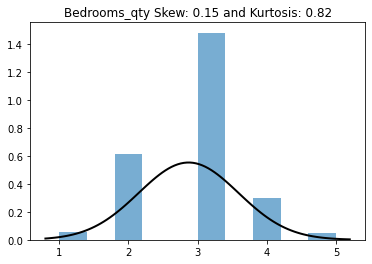

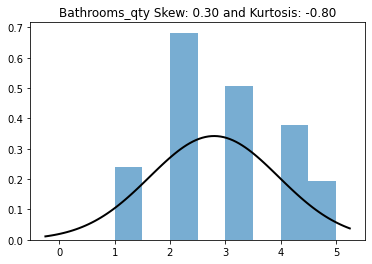

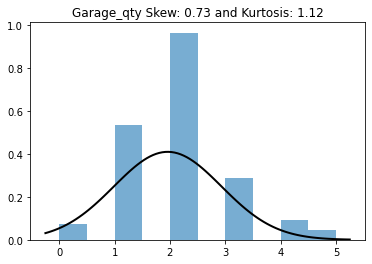

In [81]:
plot_hist_dist(columns_check,df_dum)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df_dum.drop('Price_Value', axis =1)
y = df_dum.Price_Value.values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# multiple linear regression 
import statsmodels.api as sm

In [86]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\henrique.innecco\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     97.38
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:30:28   Log-Likelihood:                -882.24
No. Observations:                4201   AIC:                             2044.
Df Residuals:                    4061   BIC:                             2933.
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
c_Elevador                                  0.0171      0.013      1.299      0.194      -0.009       0.043
c_Portaria                                 -0.0167      0.018     -0.913      0.362      -0.053       0.019
c_Piscina                                   0.1772      0.055      3.220      0.001       0.069       0.285
c_Portao_eletronico                        -0.0534      0.039     -1.359      0.174      -0.131       0.024
c_Condominio_fechado                       -0.0868      0.015     -5.839      0.000      -0.116      -0.058
c_Segurança_24h                            -0.0384      0.021     -1.796      0.073      -0.080       0.004
c_Permitido_animais                        -0.0562      0.016     -3.523      0.000      -0.088      -0.025
c_Area_murada                              -0.0219      0.078     -0.281      0.779      -0.175       0.131
c_Academia                                  0.2216      0.046      4.850      0.000       0.132       0.311
c_Salao_de_festas                          -0.0398      0.016     -2.484      0.013      -0.071      -0.008
p_Porteiro_24h                             -0.0183      0.050     -0.363      0.716      -0.117       0.081
p_Churrasqueira                             0.0734      0.014      5.264      0.000       0.046       0.101
p_Piscina                                   0.0402      0.055      0.724      0.469      -0.069       0.149
p_Armarios_embutidos                        0.0510      0.033      1.548      0.122      -0.014       0.116
p_Ar_condicionado                           0.0177      0.013      1.379      0.168      -0.007       0.043
p_Quarto_de_servico                        -0.0135      0.033     -0.409      0.683      -0.078       0.051
p_Varanda                                   0.0766      0.012      6.183      0.000       0.052       0.101
p_Armarios_na_cozinha                      -0.0384      0.030     -1.287      0.198      -0.097       0.020
p_Academia                                 -0.0004      0.048     -0.009      0.993      -0.094       0.093
p_Area_de_servico                          -0.0593      0.011     -5.178      0.000      -0.082      -0.037
p_Mobiliado                                -0.0347      0.015     -2.261      0.024      -0.065      -0.005
p_Salao_de_festas                           0.0009      0.056      0.015      0.988      -0.108       0.110
Area_value                                  0.3845      0.020     19.505      0.000       0.346       0.423
Bedrooms_qty                                0.0171      0.010      1.715      0.086      -0.002       0.037
Bathrooms_qty                               0.0928      0.007     14.005      0.000       0.080       0.106
Garage_qty                                  0.1081      0.0

In [87]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [88]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-149729060.39659026

In [96]:
# lasso regression 
lm_l = Lasso(alpha=.001)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.25098310762690196

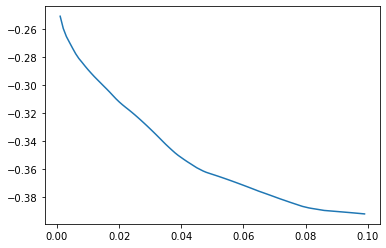

In [93]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [95]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.001,-0.250983


In [97]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.2280572222360567

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# tune models GridsearchCV 

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [100]:
gs.best_score_

-0.2240349432358181

In [101]:
gs.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 160}

In [102]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=160)

In [103]:
# test ensembles 
tpred_lm = lm.predict(X_test)

In [104]:
tpred_lml = lm_l.predict(X_test)

In [105]:
tpred_rf = gs.best_estimator_.predict(X_test)

In [106]:
from sklearn.metrics import mean_absolute_error

In [107]:
mean_absolute_error(y_test,tpred_lm)

2946641.3420042335

In [108]:
mean_absolute_error(y_test,tpred_lml)

0.23982793066499675

In [110]:
mean_absolute_error(y_test,tpred_rf)

0.21405981447720843

In [111]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

1473320.7632212313

In [112]:

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( './Resources/model_file.p', "wb" ) )

In [115]:
file_name = "./Resources/model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [116]:
for i in range(len(y_test)):
    price = np.exp(model.predict(np.array(list(X_test.iloc[i,:])).reshape(1,-1))[0])
    print(f'Predicted Value: R$ {price:.2f}')
    price = np.exp(y_test[i])
    print(f'Real Value: R$ {price:.2f}')

Predicted Value: R$ 547364.97
Real Value: R$ 550000.00
Predicted Value: R$ 559448.12
Real Value: R$ 560000.00
Predicted Value: R$ 642201.76
Real Value: R$ 890000.00
Predicted Value: R$ 913383.51
Real Value: R$ 850000.00
Predicted Value: R$ 179709.12
Real Value: R$ 160000.00
Predicted Value: R$ 604870.68
Real Value: R$ 801000.00
Predicted Value: R$ 440506.43
Real Value: R$ 480000.00
Predicted Value: R$ 873690.16
Real Value: R$ 930000.00
Predicted Value: R$ 375414.18
Real Value: R$ 510000.00
Predicted Value: R$ 265657.87
Real Value: R$ 250000.00
Predicted Value: R$ 501058.74
Real Value: R$ 500000.00
Predicted Value: R$ 728672.23
Real Value: R$ 539000.00
Predicted Value: R$ 978053.13
Real Value: R$ 1299000.00
Predicted Value: R$ 738967.79
Real Value: R$ 690000.00
Predicted Value: R$ 1234962.08
Real Value: R$ 1200000.00
Predicted Value: R$ 711597.46
Real Value: R$ 776500.00
Predicted Value: R$ 345691.08
Real Value: R$ 340000.00
Predicted Value: R$ 701766.68
Real Value: R$ 1500000.00
Predic

In [123]:
X.iloc[:,22] = np.exp(X.iloc[:,22])

In [124]:
list(X.iloc[1,:])

[1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 54.00000000000001,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]